In [2]:
import pandas as pd

In [3]:
pd.to_datetime('Jan 1 1970')

Timestamp('1970-01-01 00:00:00')

In [4]:
try:
    pd.to_datetime('Jan:1:1970')
except ValueError as e:
    print('ValueError', e)

ValueError Unknown string format: Jan:1:1970


In [5]:
url = "https://gist.githubusercontent.com/ryanorsinger/b309f8db19e0ca71b213d4877d835e77/raw/f5841017310e2f4ca070b313529ceec2375336ba/coffee_consumption.csv"
df = pd.read_csv(url)
print(df.dtypes)
df.head()

date                   object
coffee_consumption    float64
dtype: object


,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


In [6]:
df.date = pd.to_datetime(df.date)
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

In [7]:
print(pd.__version__)

1.3.4


In [8]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['weekday'] = df.date.dt.day_name()
df.head()


,date,coffee_consumption,year,month,day,weekday
0,2019-01-01,14.301915,2019,1,1,Tuesday
1,2019-01-02,12.905900,2019,1,2,Wednesday
2,2019-01-03,10.046015,2019,1,3,Thursday
3,2019-01-04,6.354805,2019,1,4,Friday
4,2019-01-07,8.545563,2019,1,7,Monday


In [9]:
del df['year']
del df['month']
del df['day']
del df['weekday']


### Use the date-time column in the df as the index on the dataframe

In [10]:
df = df.set_index('date').sort_index()
df

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-07,8.545563
...,...
2019-12-25,12.250875
2019-12-26,7.513206
2019-12-27,9.464345


In [11]:
df.index.min(), df.index.max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-12-31 00:00:00'))

In [12]:
df.index.year

Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='date', length=261)

In [13]:
df['2019-05']

/var/folders/3n/86q7c8d16r51w8vg4g5kwq280000gn/T/ipykernel_59664/3193820371.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2019-05']


,coffee_consumption
date,
2019-05-01,9.970773
2019-05-02,8.755956
2019-05-03,7.790948
2019-05-06,13.196664
2019-05-07,11.725856
...,...
2019-05-27,14.952719
2019-05-28,9.538674
2019-05-29,11.130547


In [14]:
df['2019-05-06':'2019-05-16']

,coffee_consumption
date,
2019-05-06,13.196664
2019-05-07,11.725856
2019-05-08,8.495455
2019-05-09,11.407965
2019-05-10,11.344190
2019-05-13,9.517543
2019-05-14,6.220478
2019-05-15,12.743796
2019-05-16,9.169615


In [15]:
## Upsampling/Downsampling
## - up: adding data points to a window. weekly to daily frequency
## - down: increasing the size of the window, reducing number of datapoints. daily to weekly


In [16]:
# use the asfreq method
by_day = df.asfreq('D')
by_day

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-05,NaN
...,...
2019-12-27,9.464345
2019-12-28,NaN
2019-12-29,NaN


In [17]:
## filling missing values: ffill(forward) or bfill(backward)
by_day.assign(
    ffill=lambda df: df.coffee_consumption.ffill(),
    bfill=lambda df: df.coffee_consumption.bfill()
).head(15)

,coffee_consumption,ffill,bfill
date,,,
2019-01-01,14.301915,14.301915,14.301915
2019-01-02,12.905900,12.905900,12.905900
2019-01-03,10.046015,10.046015,10.046015
2019-01-04,6.354805,6.354805,6.354805
2019-01-05,NaN,6.354805,8.545563
...,...,...,...
2019-01-11,11.872667,11.872667,11.872667
2019-01-12,NaN,11.872667,9.198816
2019-01-13,NaN,11.872667,9.198816


In [18]:
df = df.fillna(0)

In [19]:
# resampling: groupby, using date. similar to, but more flexible than .asfreq
# .resample must be followed up with an aggregate function: mean, etc
# .resample only works on DTG columns
df.resample('3W').mean() #every 3 weeks

,coffee_consumption
date,
2019-01-06,10.902159
2019-01-27,9.744190
2019-02-17,10.855301
2019-03-10,9.413472
2019-03-31,11.062768
...,...
2019-10-27,10.231028
2019-11-17,10.646560
2019-12-08,10.614282


In [20]:
df.resample('M').sum()

,coffee_consumption
date,
2019-01-31,233.926749
2019-02-28,206.038853
2019-03-31,219.779000
2019-04-30,222.030626
2019-05-31,248.480093
...,...
2019-08-31,224.007066
2019-09-30,215.689004
2019-10-31,244.153522


### Plotting time series data

<AxesSubplot:xlabel='date'>

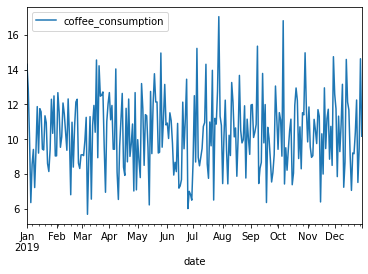

In [21]:
df.plot()

<AxesSubplot:xlabel='date'>

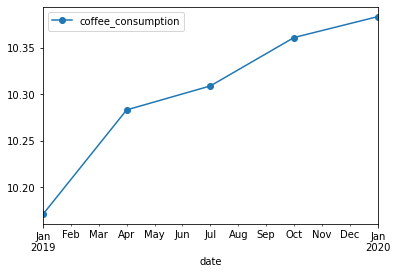

In [22]:
df.resample('3M').mean().plot(marker='o')

## Rolling Windows

,coffee_consumption,rolling_3,rolling_5,rolling_7
date,,,,
2019-01-06,10.902159,NaN,NaN,NaN
2019-01-13,9.277212,NaN,NaN,NaN
2019-01-20,10.265097,10.148156,NaN,NaN
2019-01-27,9.690260,9.744190,NaN,NaN
2019-02-03,10.639508,10.198289,10.154847,NaN
...,...,...,...,...
2019-04-21,9.881870,10.222518,10.732322,10.400220
2019-04-28,9.785978,9.846091,10.181278,10.520262
2019-05-05,9.256128,9.641326,9.941932,10.386246


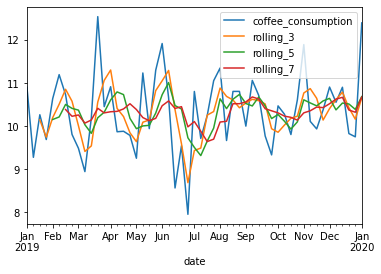

In [23]:
# use the .rolling method
rolling_df = df.resample('W').mean().assign(
    rolling_3=lambda df: df.coffee_consumption.rolling(3).mean(),
    rolling_5=lambda df: df.coffee_consumption.rolling(5).mean(),
    rolling_7=lambda df: df.coffee_consumption.rolling(7).mean()
)
rolling_df.plot()
rolling_df.head(20)

In [24]:
df.resample('W').mean().rolling(4).sum()

,coffee_consumption
date,
2019-01-06,NaN
2019-01-13,NaN
2019-01-20,NaN
2019-01-27,40.134728
2019-02-03,39.872077
...,...
2019-12-08,41.779107
2019-12-15,42.745896
2019-12-22,42.194309


In [26]:
#Lagging and Lead
# .shift and .diff methods
# shift: move data back/forward by a certain amount
# diff: finds difference with previous or specified observation

df['shift(-1)'] = df.coffee_consumption.shift(-1)
df['shift(1)'] = df.coffee_consumption.shift(1)
df['shift(3)'] = df.coffee_consumption.shift(3)
df['diff(1)'] = df.coffee_consumption.diff(1)
df["diff(3)"] = df.coffee_consumption.diff(3)

df.head(25)

,coffee_consumption,shift(-1),shift(1),shift(3),diff(1),diff(3)
date,,,,,,
2019-01-01,14.301915,12.905900,NaN,NaN,NaN,NaN
2019-01-02,12.905900,10.046015,14.301915,NaN,-1.396015,NaN
2019-01-03,10.046015,6.354805,12.905900,NaN,-2.859885,NaN
2019-01-04,6.354805,8.545563,10.046015,14.301915,-3.691210,-7.947110
2019-01-07,8.545563,9.410101,6.354805,12.905900,2.190757,-4.360337
...,...,...,...,...,...,...
2019-01-29,10.336273,12.488651,12.295298,8.141553,-1.959025,2.194720
2019-01-30,12.488651,9.035046,10.336273,9.421176,2.152378,3.067475
2019-01-31,9.035046,9.042273,12.488651,12.295298,-3.453605,-3.260252


In [27]:
df. columns

Index(['coffee_consumption', 'shift(-1)', 'shift(1)', 'shift(3)', 'diff(1)',
       'diff(3)'],
      dtype='object')

In [28]:
for col in ['shift(-1)', 'shift(1)', 'shift(3)', 'diff(1)', 'diff(3)']:
    del df[col]

df.head()


,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-07,8.545563


In [29]:
## STRFTime: format dates with date specifiers
df.index.strftime('%B %d, %Y')[:4]


Index(['January 01, 2019', 'January 02, 2019', 'January 03, 2019',
       'January 04, 2019'],
      dtype='object', name='date')

In [30]:
# timezones: 
start_date = pd.to_datetime('20190204')
graduation_date = pd.to_datetime('20190614')

days_between = graduation_date - start_date
days_between

Timedelta('130 days 00:00:00')

In [31]:
days_between // pd.Timedelta('1d')

130

In [32]:
df['days_since_max'] = (df.index.max() - df.index)//pd.Timedelta('1d')
df.tail(10)

,coffee_consumption,days_since_max
date,,
2019-12-18,9.058819,13
2019-12-19,7.056316,12
2019-12-20,9.208448,11
2019-12-23,9.162464,8
2019-12-24,10.372400,7
2019-12-25,12.250875,6
2019-12-26,7.513206,5
2019-12-27,9.464345,4
2019-12-30,14.623106,1


## Exercises

In [154]:
from vega_datasets import data
df = data.sf_temps()
df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [155]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [156]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [157]:
# df.date = pd.to_datetime(df.date, format = '%Y-%m-%d')
# df.head()

In [158]:
df = df.set_index('date').sort_index()

In [159]:
df.index.min()

Timestamp('2010-01-01 00:00:00')

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    8759 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


In [161]:
df.resample('1M').mean()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
...,...
2010-08-31,62.405376
2010-09-30,62.487083
2010-10-31,60.253091


In [162]:
df.resample('1M').sum()

,temp
date,
2010-01-31,37188.2
2010-02-28,35107.9
2010-03-31,40089.7
2010-04-30,40055.8
2010-05-31,43130.4
...,...
2010-08-31,46429.6
2010-09-30,44990.7
2010-10-31,44828.3


<AxesSubplot:xlabel='date'>

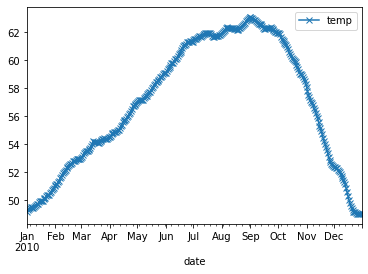

In [163]:
df.resample('1D').mean().plot(marker='x')

### 2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

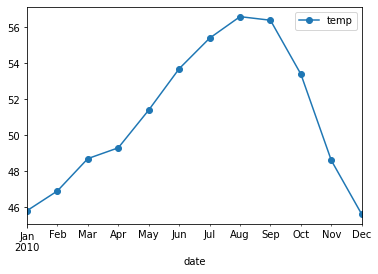

In [164]:
df.resample('1m').min().plot(marker='o')

### 3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

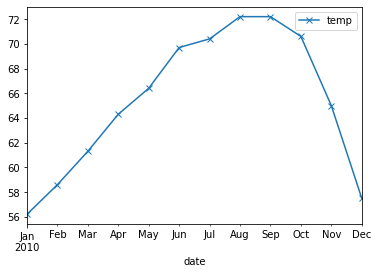

In [165]:
df.resample('1M').max().plot(marker='x')

In [166]:
df.index.min(), df.index.max()

(Timestamp('2010-01-01 00:00:00'), Timestamp('2010-12-31 23:00:00'))

### 4. Which month is the coldest, on average?

In [167]:
df['month'] = df.index.strftime('%m-%b')

In [168]:
df.head()

,temp,month
date,,
2010-01-01 00:00:00,47.8,01-Jan
2010-01-01 01:00:00,47.4,01-Jan
2010-01-01 02:00:00,46.9,01-Jan
2010-01-01 03:00:00,46.5,01-Jan
2010-01-01 04:00:00,46.0,01-Jan


In [169]:
df.month.value_counts

<bound method IndexOpsMixin.value_counts of date
2010-01-01 00:00:00    01-Jan
2010-01-01 01:00:00    01-Jan
2010-01-01 02:00:00    01-Jan
2010-01-01 03:00:00    01-Jan
2010-01-01 04:00:00    01-Jan
                        ...  
2010-12-31 19:00:00    12-Dec
2010-12-31 20:00:00    12-Dec
2010-12-31 21:00:00    12-Dec
2010-12-31 22:00:00    12-Dec
2010-12-31 23:00:00    12-Dec
Name: month, Length: 8759, dtype: object>

In [170]:
df.groupby('month').temp.mean().sort_values()

month
01-Jan    49.984140
12-Dec    50.498253
02-Feb    52.243899
03-Mar    53.956528
11-Nov    55.185139
04-Apr    55.633056
05-May    57.970968
10-Oct    60.253091
06-Jun    60.444722
07-Jul    61.765457
08-Aug    62.405376
09-Sep    62.487083
Name: temp, dtype: float64

In [171]:
daily = df.resample('D').temp.agg(['min', 'max'])
daily

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8
...,...,...
2010-12-27,45.6,53.2
2010-12-28,45.6,53.2
2010-12-29,45.6,53.2


In [172]:
daily['temp_change'] = daily['max'] - daily['min']
daily.head()


,min,max,temp_change
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


### Seattle Weather

### 1. Which year and month combination has the highest amount of precipitation?

In [175]:
import vega_datasets
from vega_datasets import data
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [178]:
df = df.set_index('date').sort_index()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [179]:
df.index.min()

Timestamp('2012-01-01 00:00:00')

In [183]:
df.resample('M').precipitation.sum().min()

0.0

## Flights

In [192]:
import numpy as np

In [189]:
df = data.flights_20k()

In [190]:
df = df.sort_values(by='date').reset_index(drop=True)

In [191]:
df = df.set_index('date')
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


In [ ]:
pd.Series(range(1,11).clip(lower=3, upper=7))

In [ ]:
df.delay.clip(lower=0)

In [193]:
df.delay = np.where(df.delay < 0, 0, df.delay)

In [194]:
# highest delay
df['hour'] = df.index.hour

In [195]:
df.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0
2001-01-01 06:20:00,0,491,BNA,MCI,6
2001-01-01 06:30:00,0,251,MDW,STL,6
2001-01-01 07:00:00,0,361,OAK,ONT,7
2001-01-01 07:00:00,0,303,MSY,HOU,7


In [196]:
df.groupby('hour').delay.mean().sort_values().tail()

hour
22     32.704607
23     65.353846
0     127.916667
1     170.000000
3     302.500000
Name: delay, dtype: float64

In [198]:
df['weekday'] = df.index.strftime('%w-%a')
df.head()

,delay,distance,origin,destination,hour,weekday
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,1-Mon
2001-01-01 06:20:00,0,491,BNA,MCI,6,1-Mon
2001-01-01 06:30:00,0,251,MDW,STL,6,1-Mon
2001-01-01 07:00:00,0,361,OAK,ONT,7,1-Mon
2001-01-01 07:00:00,0,303,MSY,HOU,7,1-Mon


In [200]:
df.groupby('weekday').delay.mean().sort_values()

weekday
1-Mon     7.165772
6-Sat     8.431498
2-Tue     9.410866
0-Sun    10.413542
3-Wed    11.032478
4-Thu    12.821322
5-Fri    17.757596
Name: delay, dtype: float64

In [205]:
df['month'] = df.index.strftime('%m-%b')
df.groupby('month').delay.mean().sort_values()

month
03-Mar     9.875287
01-Jan    11.301592
02-Feb    12.306106
Name: delay, dtype: float64